In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('C:\\Users\\HP\\Downloads\cerealspga05.csv')

dfnew = df[['calories',
'protein',
'fat',
'sodium',
'fiber',
'carbo',
'sugars',
'potass',
'vitamins','rating']]

In [3]:
dfnew.head()
#name ,mfr

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,rating
0,70,4,1,130,10.0,5.0,6,280,25,68.402973
1,70,4,1,260,9.0,7.0,5,320,25,59.425505
2,50,4,0,140,14.0,8.0,0,330,25,93.704912
3,110,3,3,140,4.0,10.0,7,160,25,40.448772
4,120,3,1,200,6.0,11.0,14,260,25,37.840594


In [19]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=12)

kmeans.fit(dfnew)
y_kmeans = kmeans.predict(dfnew)

In [20]:
y_kmeans

array([ 7,  8,  7,  5,  1,  1,  2,  4,  4,  0,  3,  3,  1,  4,  3,  4,  5,
        4,  6,  6,  0,  4, 11,  4,  5,  4,  0,  4,  2,  1,  0, 11,  6,  5,
        5, 11,  4,  3,  4, 10, 10,  6,  5,  4,  2,  5,  3,  4,  3,  5,  5,
        6,  9,  9,  5,  2,  5,  2,  6,  6,  2,  2,  2, 11,  4,  2, 10,  1,
       10,  6,  0,  3,  3,  4])

In [22]:
#dfnew.head()
df3 = dfnew.assign(clusterNo = y_kmeans, namex = df['name'])
print(df3.head())

   calories  protein  fat  sodium  fiber  carbo  sugars  potass  vitamins  \
0        70        4    1     130   10.0    5.0       6     280        25   
1        70        4    1     260    9.0    7.0       5     320        25   
2        50        4    0     140   14.0    8.0       0     330        25   
3       110        3    3     140    4.0   10.0       7     160        25   
4       120        3    1     200    6.0   11.0      14     260        25   

      rating  clusterNo                      namex  
0  68.402973          7                  100%_Bran  
1  59.425505          8                   All-Bran  
2  93.704912          7  All-Bran_with_Extra_Fiber  
3  40.448772          5         Cracklin'_Oat_Bran  
4  37.840594          1      Post_Nat._Raisin_Bran  


In [24]:
from pandasql import sqldf
print(sqldf("select namex,clusterno,calories from df3 where clusterno=7"))

                       namex  clusterNo  calories
0                  100%_Bran          7        70
1  All-Bran_with_Extra_Fiber          7        50


In [25]:
print(sqldf("select namex,clusterno,calories from df3 order by clusterno"))

                          namex  clusterNo  calories
0                   Apple_Jacks          0       110
1                     Corn_Pops          0       110
2                   Froot_Loops          0       110
3                Fruity_Pebbles          0       110
4                          Trix          0       110
5         Post_Nat._Raisin_Bran          1       120
6                   Raisin_Bran          1       120
7                   Bran_Flakes          1        90
8                 Fruitful_Bran          1       120
9             Total_Raisin_Bran          1       140
10            100%_Natural_Bran          2       120
11          Frosted_Mini-Wheats          2       100
12                        Maypo          2       100
13               Quaker_Oatmeal          2       100
14               Raisin_Squares          2        90
15               Shredded_Wheat          2        80
16       Shredded_Wheat_'n'Bran          2        90
17    Shredded_Wheat_spoon_size          2    

In [71]:
x = dfnew.iloc[:, [0,1, 2, 3, 4,5,6,7,8]].values
y = dfnew.iloc[:,9]

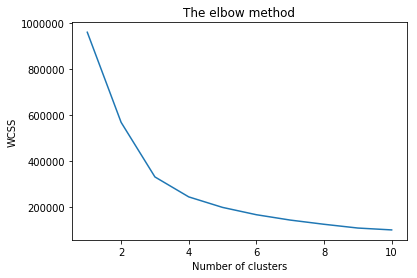

In [9]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [26]:
# 8 cluster


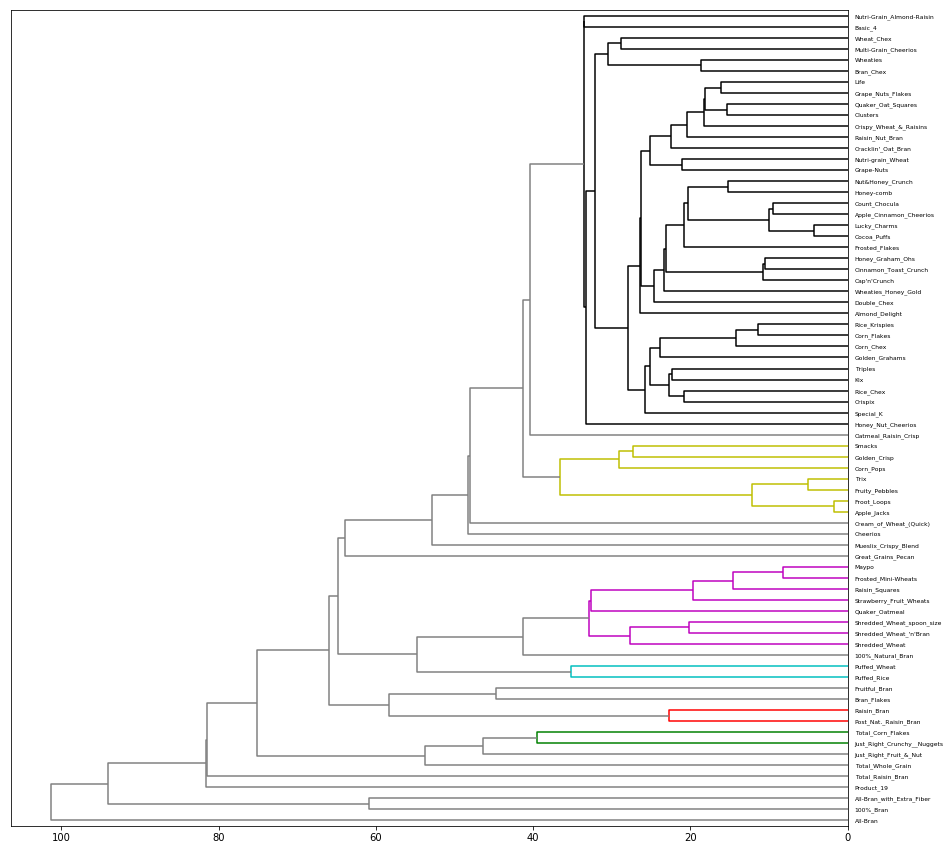

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

#df = df.set_index('name')
#del df.index.name

linked = linkage(dfnew, 'single')



plt.figure(figsize=(15, 15))  
dendrogram(linked, orientation='left',labels=df.index, color_threshold=40, above_threshold_color='grey')
plt.show()

No handles with labels found to put in legend.


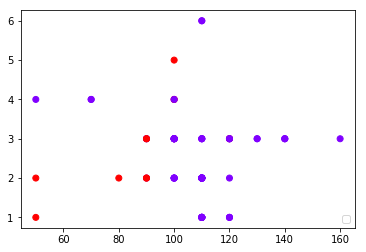

In [151]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib as mpl

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(x)


df4 = dfnew.assign(clusterNo = cluster.labels_)

fig, ax = plt.subplots()

ax.scatter(x[:,0],x[:,1], c=cluster.labels_, cmap='rainbow')

ax.legend(loc='lower right')

In [165]:
df4.head()
df.head()


,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
100%_Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
Cracklin'_Oat_Bran,K,C,110,3,3,140,4.0,10.0,7,160,25,3,1.00,0.50,40.448772
Post_Nat._Raisin_Bran,P,C,120,3,1,200,6.0,11.0,14,260,25,3,1.33,0.67,37.840594


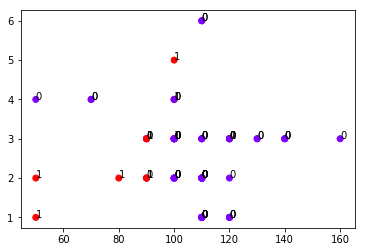

In [172]:
n = df4['clusterNo']

fig, ax = plt.subplots()

z = x[:,0]
y = x[:,1]


ax.scatter(z, y, c=cluster.labels_, cmap='rainbow')

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

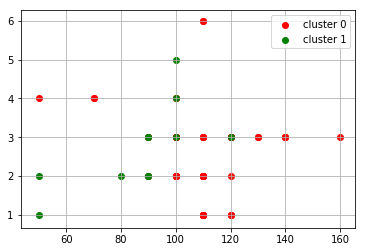

In [179]:
fig, ax = plt.subplots()
#cal, pro
a1 = sqldf("select calories,protein,clusterno from df4 where clusterno=0")
a2 = sqldf("select calories,protein,clusterno from df4 where clusterno=1")

ax.scatter(a1['calories'],a1['protein'], color="red", label="cluster 0")
ax.scatter(a2['calories'],a2['protein'], color="green", label ="cluster 1")

ax.legend()
ax.grid(True)

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2446: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


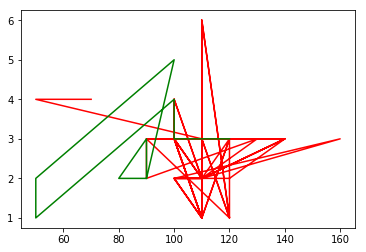

In [150]:
fig, ax = plt.subplots()
from pandasql import sqldf

a1 = sqldf("select calories,protein,clusterno from df4 where clusterno=0")
a2 = sqldf("select calories,protein,clusterno from df4 where clusterno=1")

#a1['calories']
ax.plot(a1['calories'],a1['protein'], c=cluster.labels_, color="red")

ax.plot(a2['calories'],a2['protein'], c=cluster.labels_, color="green")
plt.show()

In [183]:
# Standarize features
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_std = scaler.fit_transform(X)


# Since the clustering is sensitive to range of data. It is advisable to scale the data before proceeding.

No handles with labels found to put in legend.


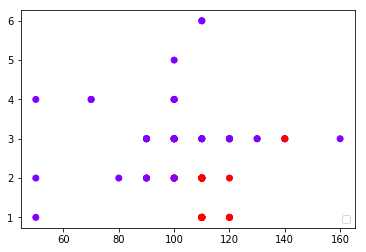

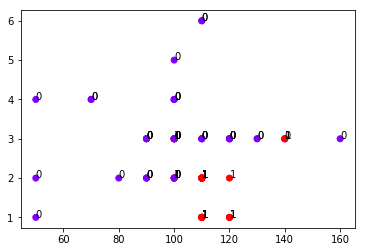

In [182]:
#Scaling of data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
xScale = ss.fit_transform(x)

from sklearn.cluster import AgglomerativeClustering
import matplotlib as mpl

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(xScale)


df4 = dfnew.assign(clusterNo = cluster.labels_)

fig, ax = plt.subplots()

ax.scatter(x[:,0],x[:,1], c=cluster.labels_, cmap='rainbow')

ax.legend(loc='lower right')

n = df4['clusterNo']

fig, ax = plt.subplots()

z = x[:,0]
y = x[:,1]


ax.scatter(z, y, c=cluster.labels_, cmap='rainbow')

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))